In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks
import math

In [2]:
datafile = 'truecode-metrics-august-2023.csv'

SYMBOLS = [ 'Strategy', 'Bitcoin', 'SPY', 'QQQ']

SYMBOL_COLORS = {
    'Strategy': '#CAB145',
    'Bitcoin': '#567DC5', 
    'SPY': '#dddddd', 
    'QQQ': '#C0C0C0', 
}

SYMBOL_LINEWIDTH = {
    'Strategy': '4',
}


SYMBOLS, SYMBOL_COLORS, SYMBOL_LINEWIDTH


(['Strategy', 'Bitcoin', 'SPY', 'QQQ'],
 {'Strategy': '#CAB145',
  'Bitcoin': '#567DC5',
  'SPY': '#dddddd',
  'QQQ': '#C0C0C0'},
 {'Strategy': '4'})

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-08-31')

In [4]:
# BITCOIN-FUND is Bitcoin metrics over the same time period as the Fund
# BITCOIN-COMBINED is Bitcoin metrics over the same time period as the combined Fund and Family Office Account
PITCH_DECK_METRICS = {
    'FUND': {},
    'COMBINED': {},
    'BITCOIN-FUND': {},
    'BITCOIN-COMBINED': {},
    'SPY': {},
    'QQQ': {},
}

# Font Configuration

If you receive an exception for Roboto Condensed or Roboto, stop here and fix the font configuration.

In [5]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: "/usr/local/etc/fonts/fonts.conf", line 86: unknown element "blank"


['/System/Library/Fonts/Supplemental/Al Tarikh.ttc',
 '/Library/Fonts/Melissa-Regular.ttf',
 '/Library/Fonts/Microsoft/MS Reference Sans Serif.ttf',
 '/Library/Fonts/Microsoft/Consolas Italic.ttf',
 '/Library/Fonts/AdobeArabic-Bold.otf',
 '/Library/Fonts/KozGoPr6N-Regular.otf',
 '/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf',
 '/System/Library/Fonts/Supplemental/SukhumvitSet.ttc',
 '/Library/Fonts/Microsoft/Perpetua Bold.ttf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/Kannada MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansPauCinHau-Regular.ttf',
 '/Library/Fonts/Microsoft/Candara Bold Italic.ttf',
 '/System/Library/Fonts/NotoSerifMyanmar.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf',
 '/System/Library/Fonts/Noteworthy.ttc',
 '/Library/Fonts/TrajanPro-Regular.otf',
 '/System/Library/Fonts/Supplemental/Party

In [6]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

findfont: Font family ['Roboto Condensed'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


'/Users/jmp/.pyenv/versions/3.8.2/envs/truecode_metrics/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Configure Charts

In [7]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 2,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [8]:
prices = pd.read_csv(datafile)
print(prices)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

            Date    Strategy     Bitcoin         SPY         QQQ
0     12/19/2019 10,000.0000 10,000.0000 10,000.0000 10,000.0000
1     12/20/2019 10,036.1900 10,052.4900  9,994.7000 10,040.3100
2     12/21/2019  9,981.8100  9,975.4600  9,994.7000 10,040.3100
3     12/22/2019 10,342.4300 10,491.0800  9,994.7000 10,040.3100
4     12/23/2019 10,163.9500 10,233.2600 10,009.9700 10,045.0500
...          ...         ...         ...         ...         ...
1424         NaN         NaN         NaN         NaN         NaN
1425         NaN         NaN         NaN         NaN         NaN
1426         NaN         NaN         NaN         NaN         NaN
1427         NaN         NaN         NaN         NaN         NaN
1428         NaN         NaN         NaN         NaN         NaN

[1429 rows x 5 columns]


In [9]:
prices[['Strategy', 'Bitcoin', 'SPY', 'QQQ']]

,Strategy,Bitcoin,SPY,QQQ
Date,,,,
2019-12-19,"10,000.0000","10,000.0000","10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900","9,994.7000","10,040.3100"
2019-12-21,"9,981.8100","9,975.4600","9,994.7000","10,040.3100"
2019-12-22,"10,342.4300","10,491.0800","9,994.7000","10,040.3100"
2019-12-23,"10,163.9500","10,233.2600","10,009.9700","10,045.0500"
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


# Fund Statistics

In [10]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[SYMBOLS].calc_stats()

PITCH_DECK_METRICS['FUND']['Month to Date'] = stats['Strategy'].mtd
PITCH_DECK_METRICS['BITCOIN-FUND']['Month to Date'] = stats['Bitcoin'].mtd
PITCH_DECK_METRICS['SPY']['Month to Date'] = stats['SPY'].mtd
PITCH_DECK_METRICS['QQQ']['Month to Date'] = stats['QQQ'].mtd

PITCH_DECK_METRICS['FUND']['Year to Date'] = stats['Strategy'].ytd
PITCH_DECK_METRICS['BITCOIN-FUND']['Year to Date'] = stats['Bitcoin'].ytd
PITCH_DECK_METRICS['SPY']['Year to Date'] = stats['SPY'].ytd
PITCH_DECK_METRICS['QQQ']['Year to Date'] = stats['QQQ'].ytd

PITCH_DECK_METRICS['FUND']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-FUND']['CAGR'] = stats['Bitcoin'].cagr

stats.display()

Stat                 Strategy    Bitcoin     SPY         QQQ
-------------------  ----------  ----------  ----------  ----------
Start                2022-05-01  2022-05-01  2022-05-01  2022-05-01
End                  2023-08-31  2023-08-31  2023-08-31  2023-08-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         -6.90%      -30.03%     9.31%       20.67%
Daily Sharpe         0.01        -0.16       0.36        0.55
Daily Sortino        0.02        -0.25       0.57        0.89
CAGR                 -5.22%      -23.49%     6.90%       15.13%
Max Drawdown         -32.35%     -59.64%     -17.02%     -21.91%
Calmar Ratio         -0.16       -0.39       0.41        0.69

MTD                  -1.63%      -11.26%     -1.63%      -1.48%
3m                   -9.28%      -4.67%      7.78%       8.62%
6m                   -14.32%     12.10%      13.65%      28.76%
YTD                  11.23%      56.81%      17.76%      41.95%
1Y                   -18.37%     29.

/Users/jmp/code/truecode_metrics/graph-returns-fund.pdf

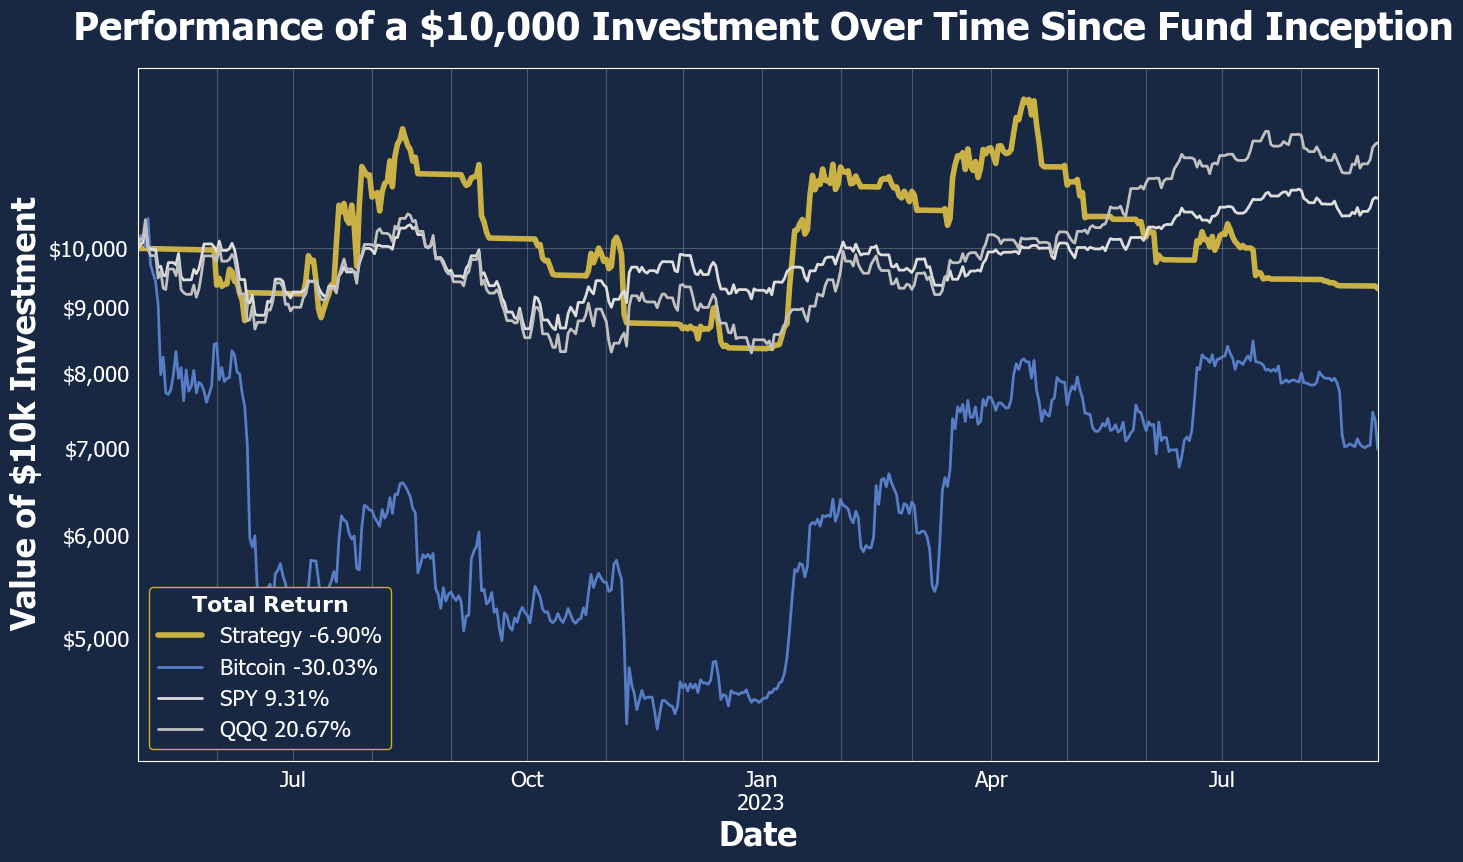

In [11]:
ax = sample[SYMBOLS].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')
display(FileLink('graph-returns-fund.pdf'))



# Combined Family Office Account + Fund History Statistics

In [12]:
stats = prices[SYMBOLS].calc_stats()
PITCH_DECK_METRICS['COMBINED']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-COMBINED']['CAGR'] = stats['Bitcoin'].cagr
PITCH_DECK_METRICS['SPY']['CAGR'] = stats['SPY'].cagr
PITCH_DECK_METRICS['QQQ']['CAGR'] = stats['QQQ'].cagr

PITCH_DECK_METRICS['COMBINED']['Daily Sortino'] = stats['Strategy'].daily_sortino
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Daily Sortino'] = stats['Bitcoin'].daily_sortino
PITCH_DECK_METRICS['SPY']['Daily Sortino'] = stats['SPY'].daily_sortino
PITCH_DECK_METRICS['QQQ']['Daily Sortino'] = stats['QQQ'].daily_sortino

PITCH_DECK_METRICS['COMBINED']['Calmar'] = stats['Strategy'].calmar
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Calmar'] = stats['Bitcoin'].calmar
PITCH_DECK_METRICS['SPY']['Calmar'] = stats['SPY'].calmar
PITCH_DECK_METRICS['QQQ']['Calmar'] = stats['QQQ'].calmar

PITCH_DECK_METRICS['COMBINED']['Max Drawdown'] = stats['Strategy'].max_drawdown
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Max Drawdown'] = stats['Bitcoin'].max_drawdown
PITCH_DECK_METRICS['SPY']['Max Drawdown'] = stats['SPY'].max_drawdown
PITCH_DECK_METRICS['QQQ']['Max Drawdown'] = stats['QQQ'].max_drawdown

PITCH_DECK_METRICS['COMBINED']['Total Return'] = stats['Strategy'].total_return
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Total Return'] = stats['Bitcoin'].total_return
PITCH_DECK_METRICS['SPY']['Total Return'] = stats['SPY'].total_return
PITCH_DECK_METRICS['QQQ']['Total Return'] = stats['QQQ'].total_return

PITCH_DECK_METRICS['COMBINED']['Volatility'] = stats['Strategy'].yearly_vol
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Volatility'] = stats['Bitcoin'].yearly_vol
PITCH_DECK_METRICS['SPY']['Volatility'] = stats['SPY'].yearly_vol
PITCH_DECK_METRICS['QQQ']['Volatility'] = stats['QQQ'].yearly_vol

stats.display()

Stat                 Strategy    Bitcoin     SPY         QQQ
-------------------  ----------  ----------  ----------  ----------
Start                2019-12-19  2019-12-19  2019-12-19  2019-12-19
End                  2023-08-31  2023-08-31  2023-08-31  2023-08-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         355.68%     268.26%     40.34%      79.26%
Daily Sharpe         1.01        0.72        0.42        0.59
Daily Sortino        1.70        1.15        0.63        0.90
CAGR                 50.69%      42.25%      9.60%       17.09%
Max Drawdown         -32.35%     -76.28%     -34.10%     -35.62%
Calmar Ratio         1.57        0.55        0.28        0.48

MTD                  -1.63%      -11.26%     -1.63%      -1.48%
3m                   -9.28%      -4.67%      7.78%       8.62%
6m                   -14.32%     12.10%      13.65%      28.76%
YTD                  11.23%      56.81%      17.76%      41.95%
1Y                   -18.37%     29.

/Users/jmp/code/truecode_metrics/graph-returns-all.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

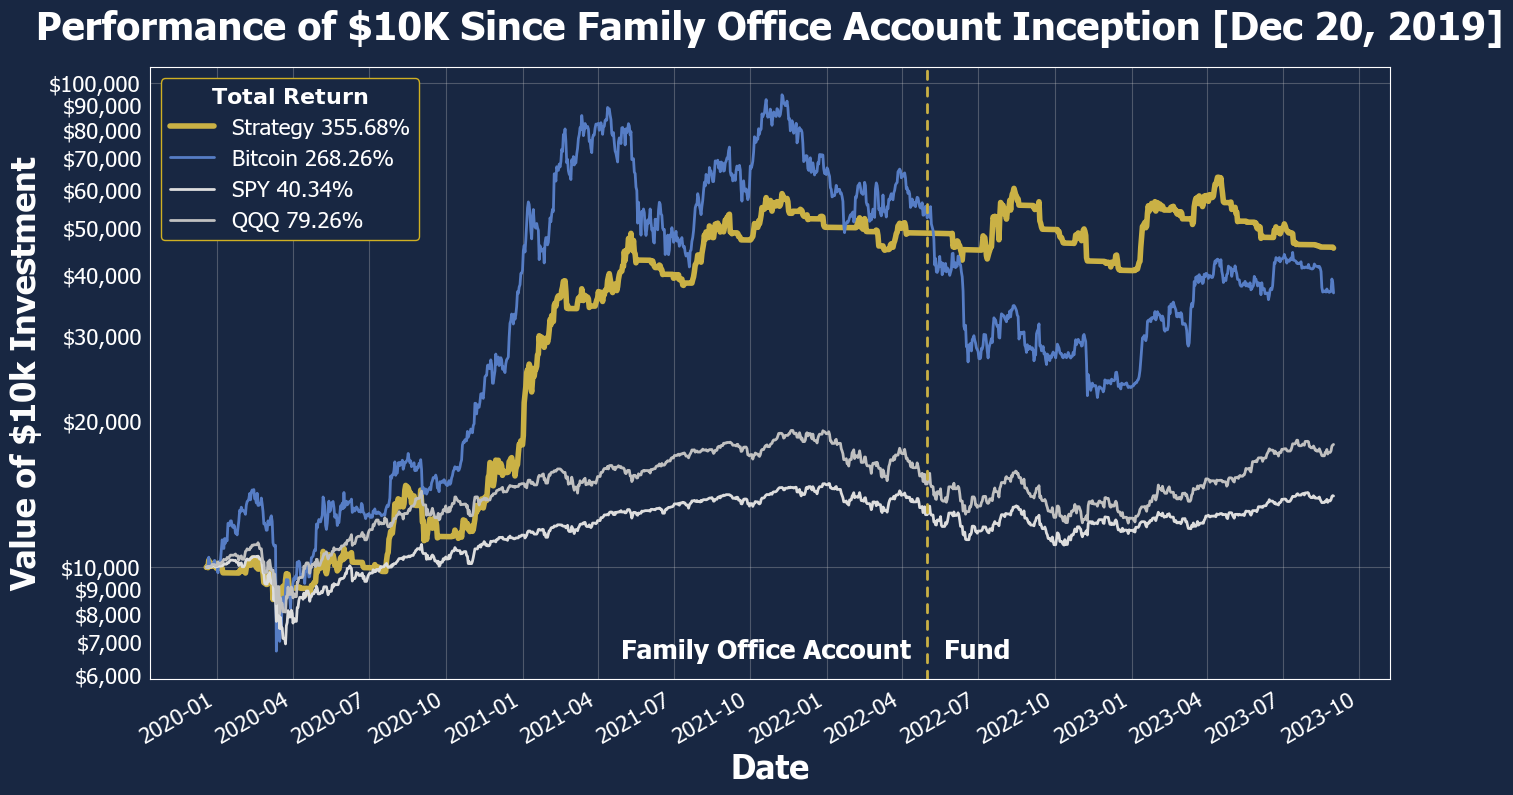

<Figure size 1600x900 with 0 Axes>

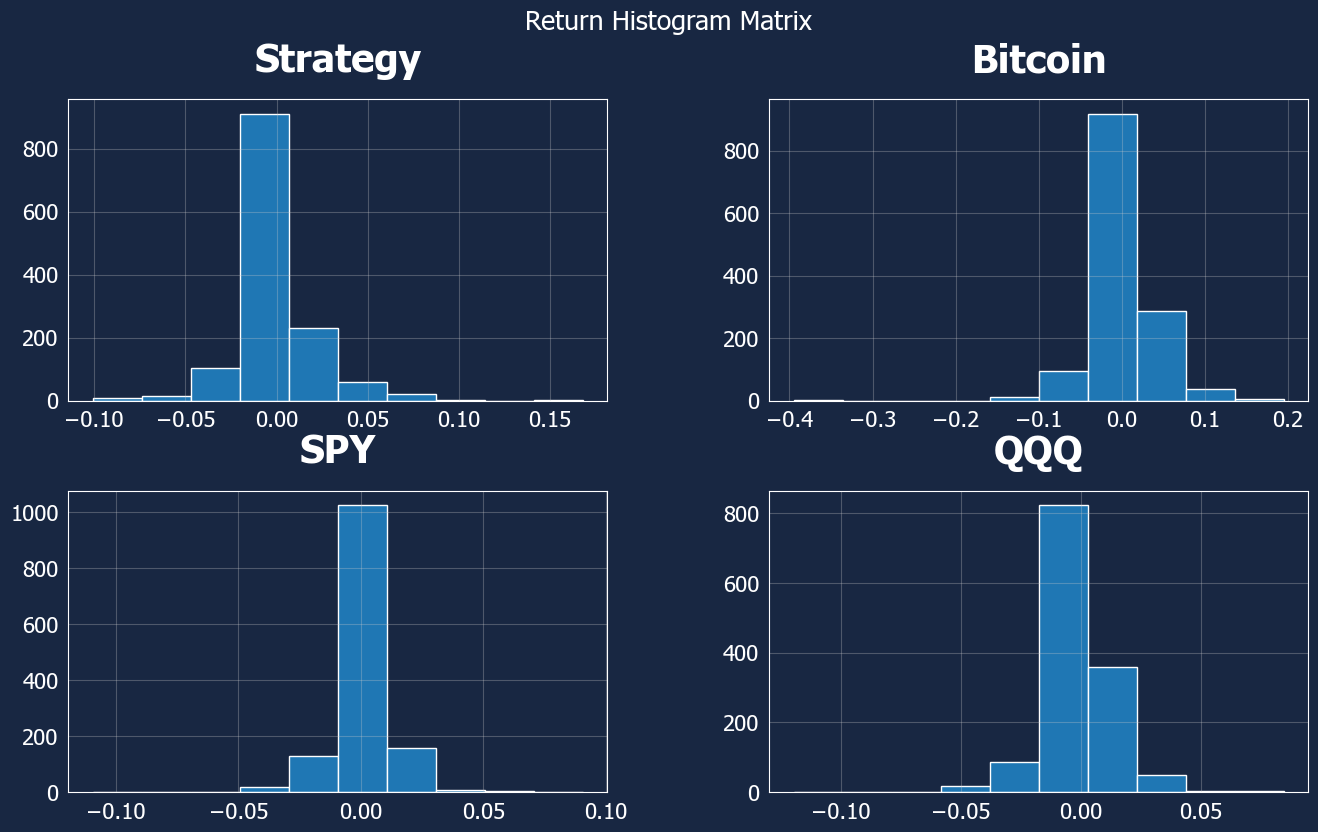

In [13]:
ax = prices[SYMBOLS].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = prices[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='upper left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')
display(FileLink('graph-returns-all.pdf'))

sample_stats.plot_histograms(figsize=(16, 9))

/Users/jmp/code/truecode_metrics/graph-returns-2022-bear-market.pdf

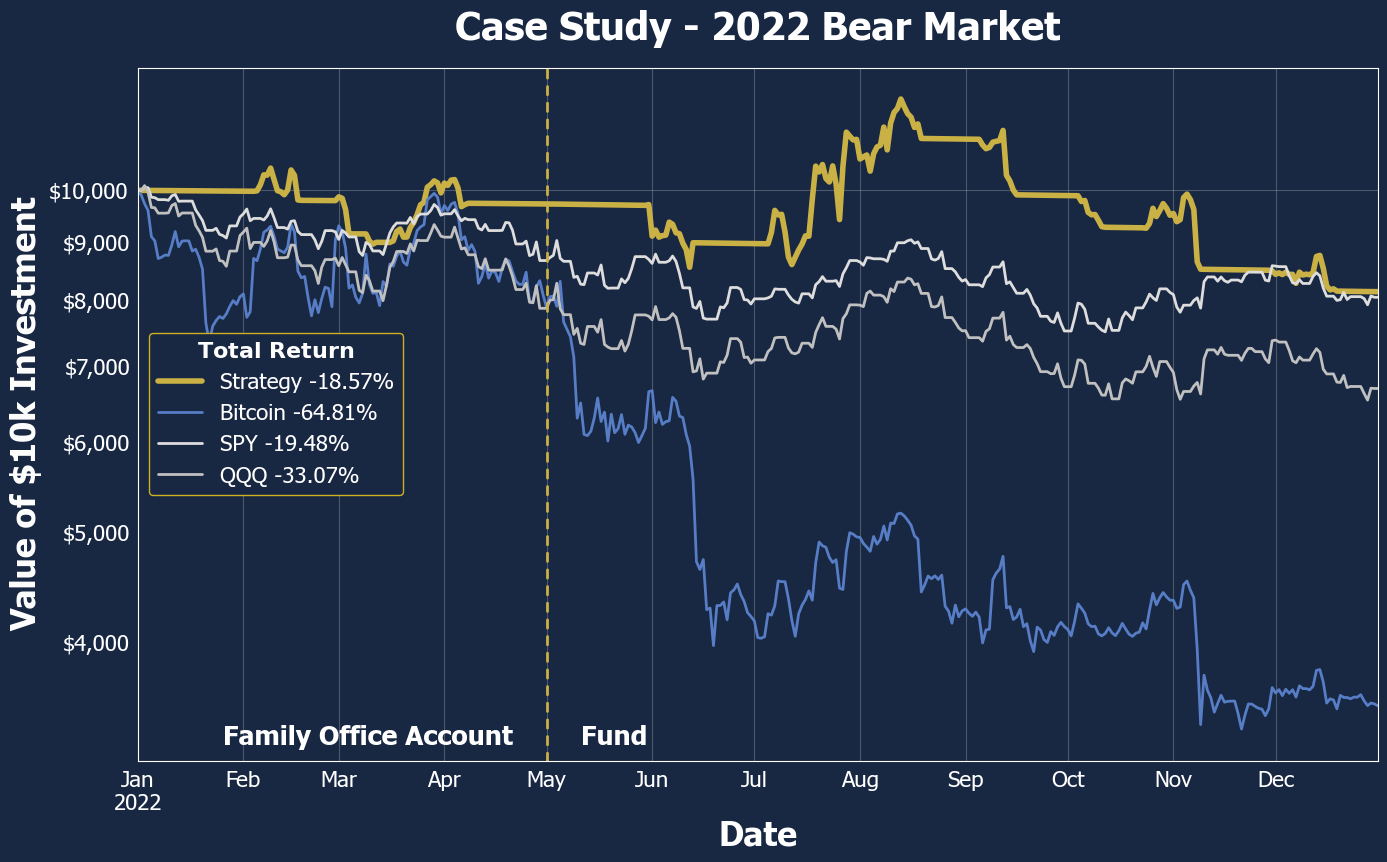

In [14]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[SYMBOLS], value=10000)
ax = rebased_sample[SYMBOLS].plot.line(title='Case Study - 2022 Bear Market', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = rebased_sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='center left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=10), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=10), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')
display(FileLink('graph-returns-2022-bear-market.pdf'))


/Users/jmp/code/truecode_metrics/drawdowns.pdf

/Users/jmp/code/truecode_metrics/drawdowns.csv

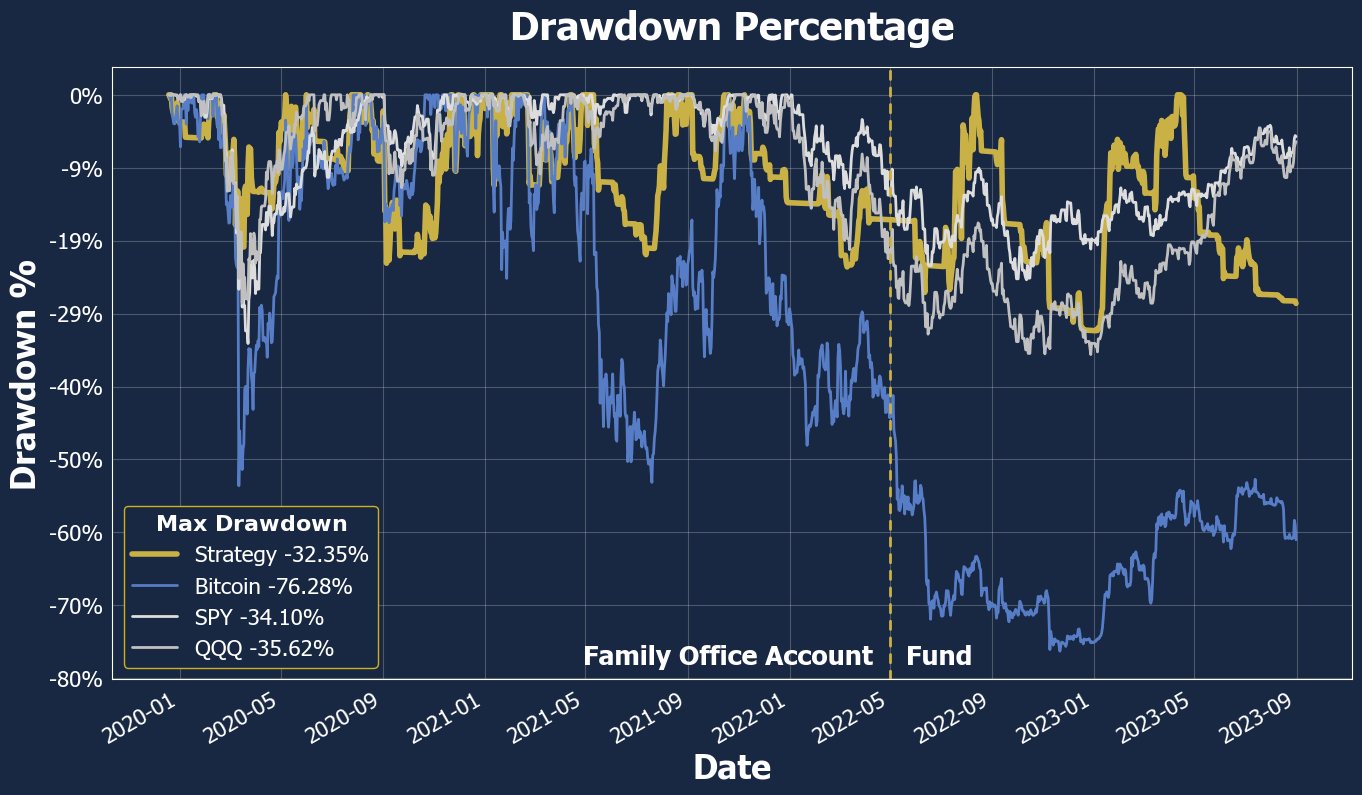

In [15]:
rebased_sample = ffn.rebase(prices[SYMBOLS], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color=SYMBOL_COLORS)
rebased_drawdown_stats = rebased_sample[SYMBOLS].calc_stats()

# rebased_drawdown_stats.display()
for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

max_drawdowns = {}
for symbol in SYMBOLS:
    max_drawdowns[symbol] = rebased_drawdown_stats[symbol].stats['max_drawdown']

ax.legend(
    (
        'Strategy {:.2f}%'.format(max_drawdowns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(max_drawdowns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(max_drawdowns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(max_drawdowns['QQQ'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

fig.savefig('drawdowns.pdf')
display(FileLink('drawdowns.pdf'))

drawdowns.to_csv('drawdowns.csv')
display(FileLink('drawdowns.csv'))



In [16]:
# strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(pd.DataFrame.pct_change, freq='M')
strategy_monthly_returns = prices['Strategy'].pct_change(freq='M')

strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date
2019-12-19      NaN
2019-12-20      NaN
2019-12-21      NaN
2019-12-22      NaN
2019-12-23      NaN
              ...  
NaT          0.0000
NaT          0.0000
NaT          0.0000
NaT          0.0000
NaT          0.0000
Name: Strategy, Length: 1429, dtype: float64

# Calculate VaR

Bitcoin VaR = 0.052807378984215426
Strategy VaR = 0.02964108247147758


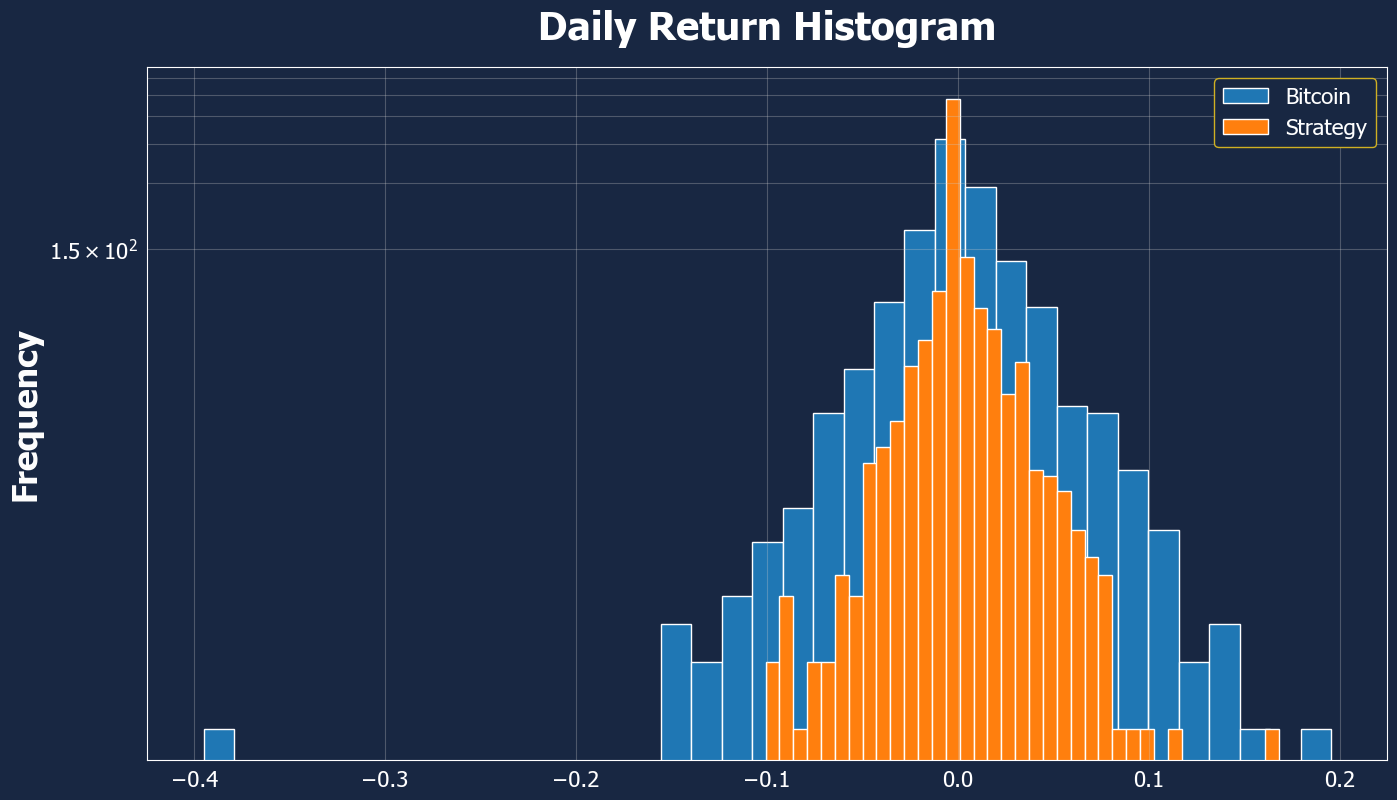

In [17]:
bitcoin_daily_returns = prices['Bitcoin'].pct_change(freq="D")
strategy_daily_returns = prices['Strategy'].pct_change(freq="D")

VaR_95_bitcoin = abs(bitcoin_daily_returns.quantile(0.05))
VaR_95_strategy = abs(strategy_daily_returns.quantile(0.05))

print('Bitcoin VaR =', VaR_95_bitcoin)
print('Strategy VaR =', VaR_95_strategy)

ax = bitcoin_daily_returns.plot(kind='hist', logy=True, legend=True, title='Daily Return Histogram', bins=int(math.sqrt(len(bitcoin_daily_returns))))
strategy_daily_returns.plot(kind='hist', logy=True, legend=True, bins=int(math.sqrt(len(strategy_daily_returns))))

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

PITCH_DECK_METRICS['COMBINED']['VaR (95%)'] = VaR_95_strategy
PITCH_DECK_METRICS['BITCOIN-COMBINED']['VaR (95%)'] = VaR_95_bitcoin


# Calculate Correlation

In [18]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.6304
Bitcoin,0.6304,1.0000


In [19]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
PITCH_DECK_METRICS['COMBINED']['Correlation to BTC'] = strategy_corr
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Correlation to BTC'] = 1.0
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.6304


# Calculate Volatility & Beta

In [20]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.8802
Bitcoin Volatility = 1.534


# Calculate Beta

In [21]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
PITCH_DECK_METRICS['COMBINED']['Beta'] = beta
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Beta'] = 1.0
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.3618


# Dump Metrics to Centralized File

In [22]:
pdmdf = pd.DataFrame(PITCH_DECK_METRICS)
pdmdf.transpose().to_csv('pitch_deck_metrics.csv')
pdmdf.transpose()

,Month to Date,Year to Date,CAGR,Daily Sortino,Calmar,Max Drawdown,Total Return,Volatility,VaR (95%),Correlation to BTC,Beta
FUND,-0.0163,0.1123,-0.0522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMBINED,NaN,NaN,0.5069,1.7008,1.5670,-0.3235,3.5568,0.8802,0.0296,0.6304,0.3618
BITCOIN-FUND,-0.1126,0.5681,-0.2349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BITCOIN-COMBINED,NaN,NaN,0.4225,1.1532,0.5540,-0.7628,2.6826,1.5336,0.0528,1.0000,1.0000
SPY,-0.0163,0.1776,0.0960,0.6321,0.2813,-0.3410,0.4034,0.2047,NaN,NaN,NaN
QQQ,-0.0148,0.4195,0.1709,0.8988,0.4799,-0.3562,0.7926,0.3698,NaN,NaN,NaN
